# Dogs classification

Authors: Michał Sułek, Andrzej Przybylski, Łukasz Kostrzewa, Patrycja Cieplicka
Date: 26.03.2021

In [93]:
import tensorflow as tf
import keras
import numpy as np
import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt

Load images

In [50]:
path = "images/Images/"

In [87]:
IMG_SIZE = 224

In [125]:
NUM_CLASSES = 3

In [122]:
def load_images(path, num_of_classes) :
    folders = os.listdir(path)
    max_classes = len(folders)
    
    dog_dict = {}
    for f in folders :
        dog_dict[f.split('-')[0]] = f.split('-')[1]
    
    image_files = []
    labels = []
    
    for num,f in enumerate(folders):
        images = os.listdir(path + f)
        if num == num_of_classes or max_classes == num: break;
        for i in images:
            image_files.append(resize(io.imread(path +f +"/" + i), (IMG_SIZE, IMG_SIZE, 3)))
            labels.append(dog_dict[f.split('-')[0]])
    
    return image_files, labels

In [126]:
image_files, labels = load_images(path, NUM_CLASSES)

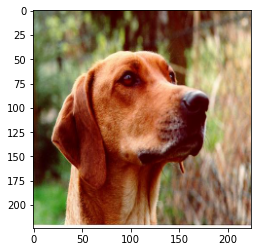

In [127]:
plt.imshow(image_files[0])

Load MobileNetV3 model

include_top = True (1000 classes)

include_top = False (without classifier) -> pooling ='avg' (to 2D array)

In [156]:
model = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3), alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, pooling=None, dropout_rate=0.2, classifier_activation='softmax'
)

In [157]:
model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_13 (Rescaling)        (None, 224, 224, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_13[0][0]               
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

Prepare input data to fit model

In [158]:
X = np.stack(image_files)

In [159]:
X = tf.keras.applications.mobilenet_v3.preprocess_input(x, data_format=None)

In [160]:
prediction = model(X)

In [161]:
prediction.shape

TensorShape([3, 1000])